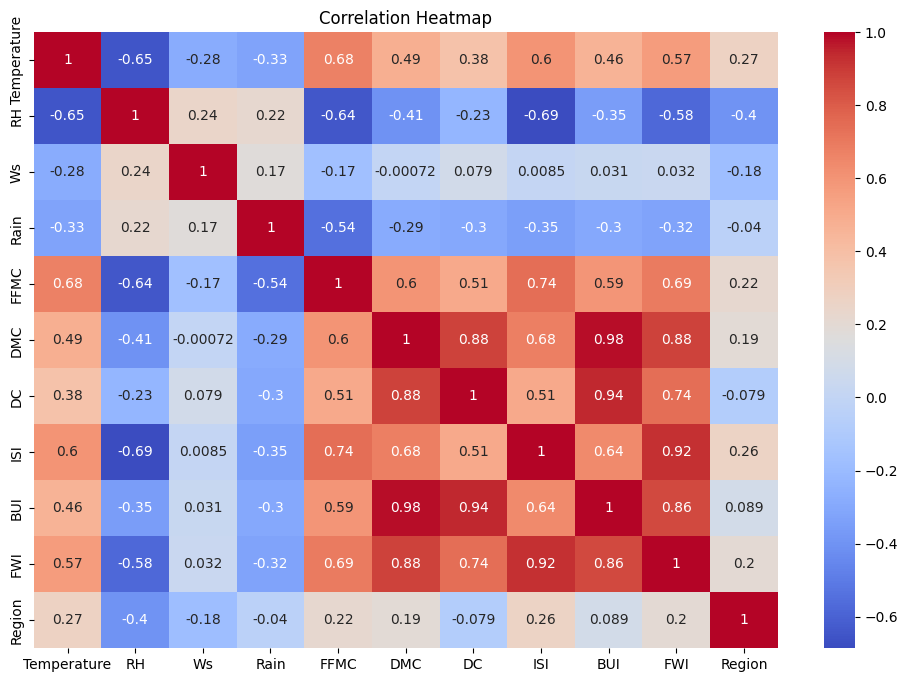

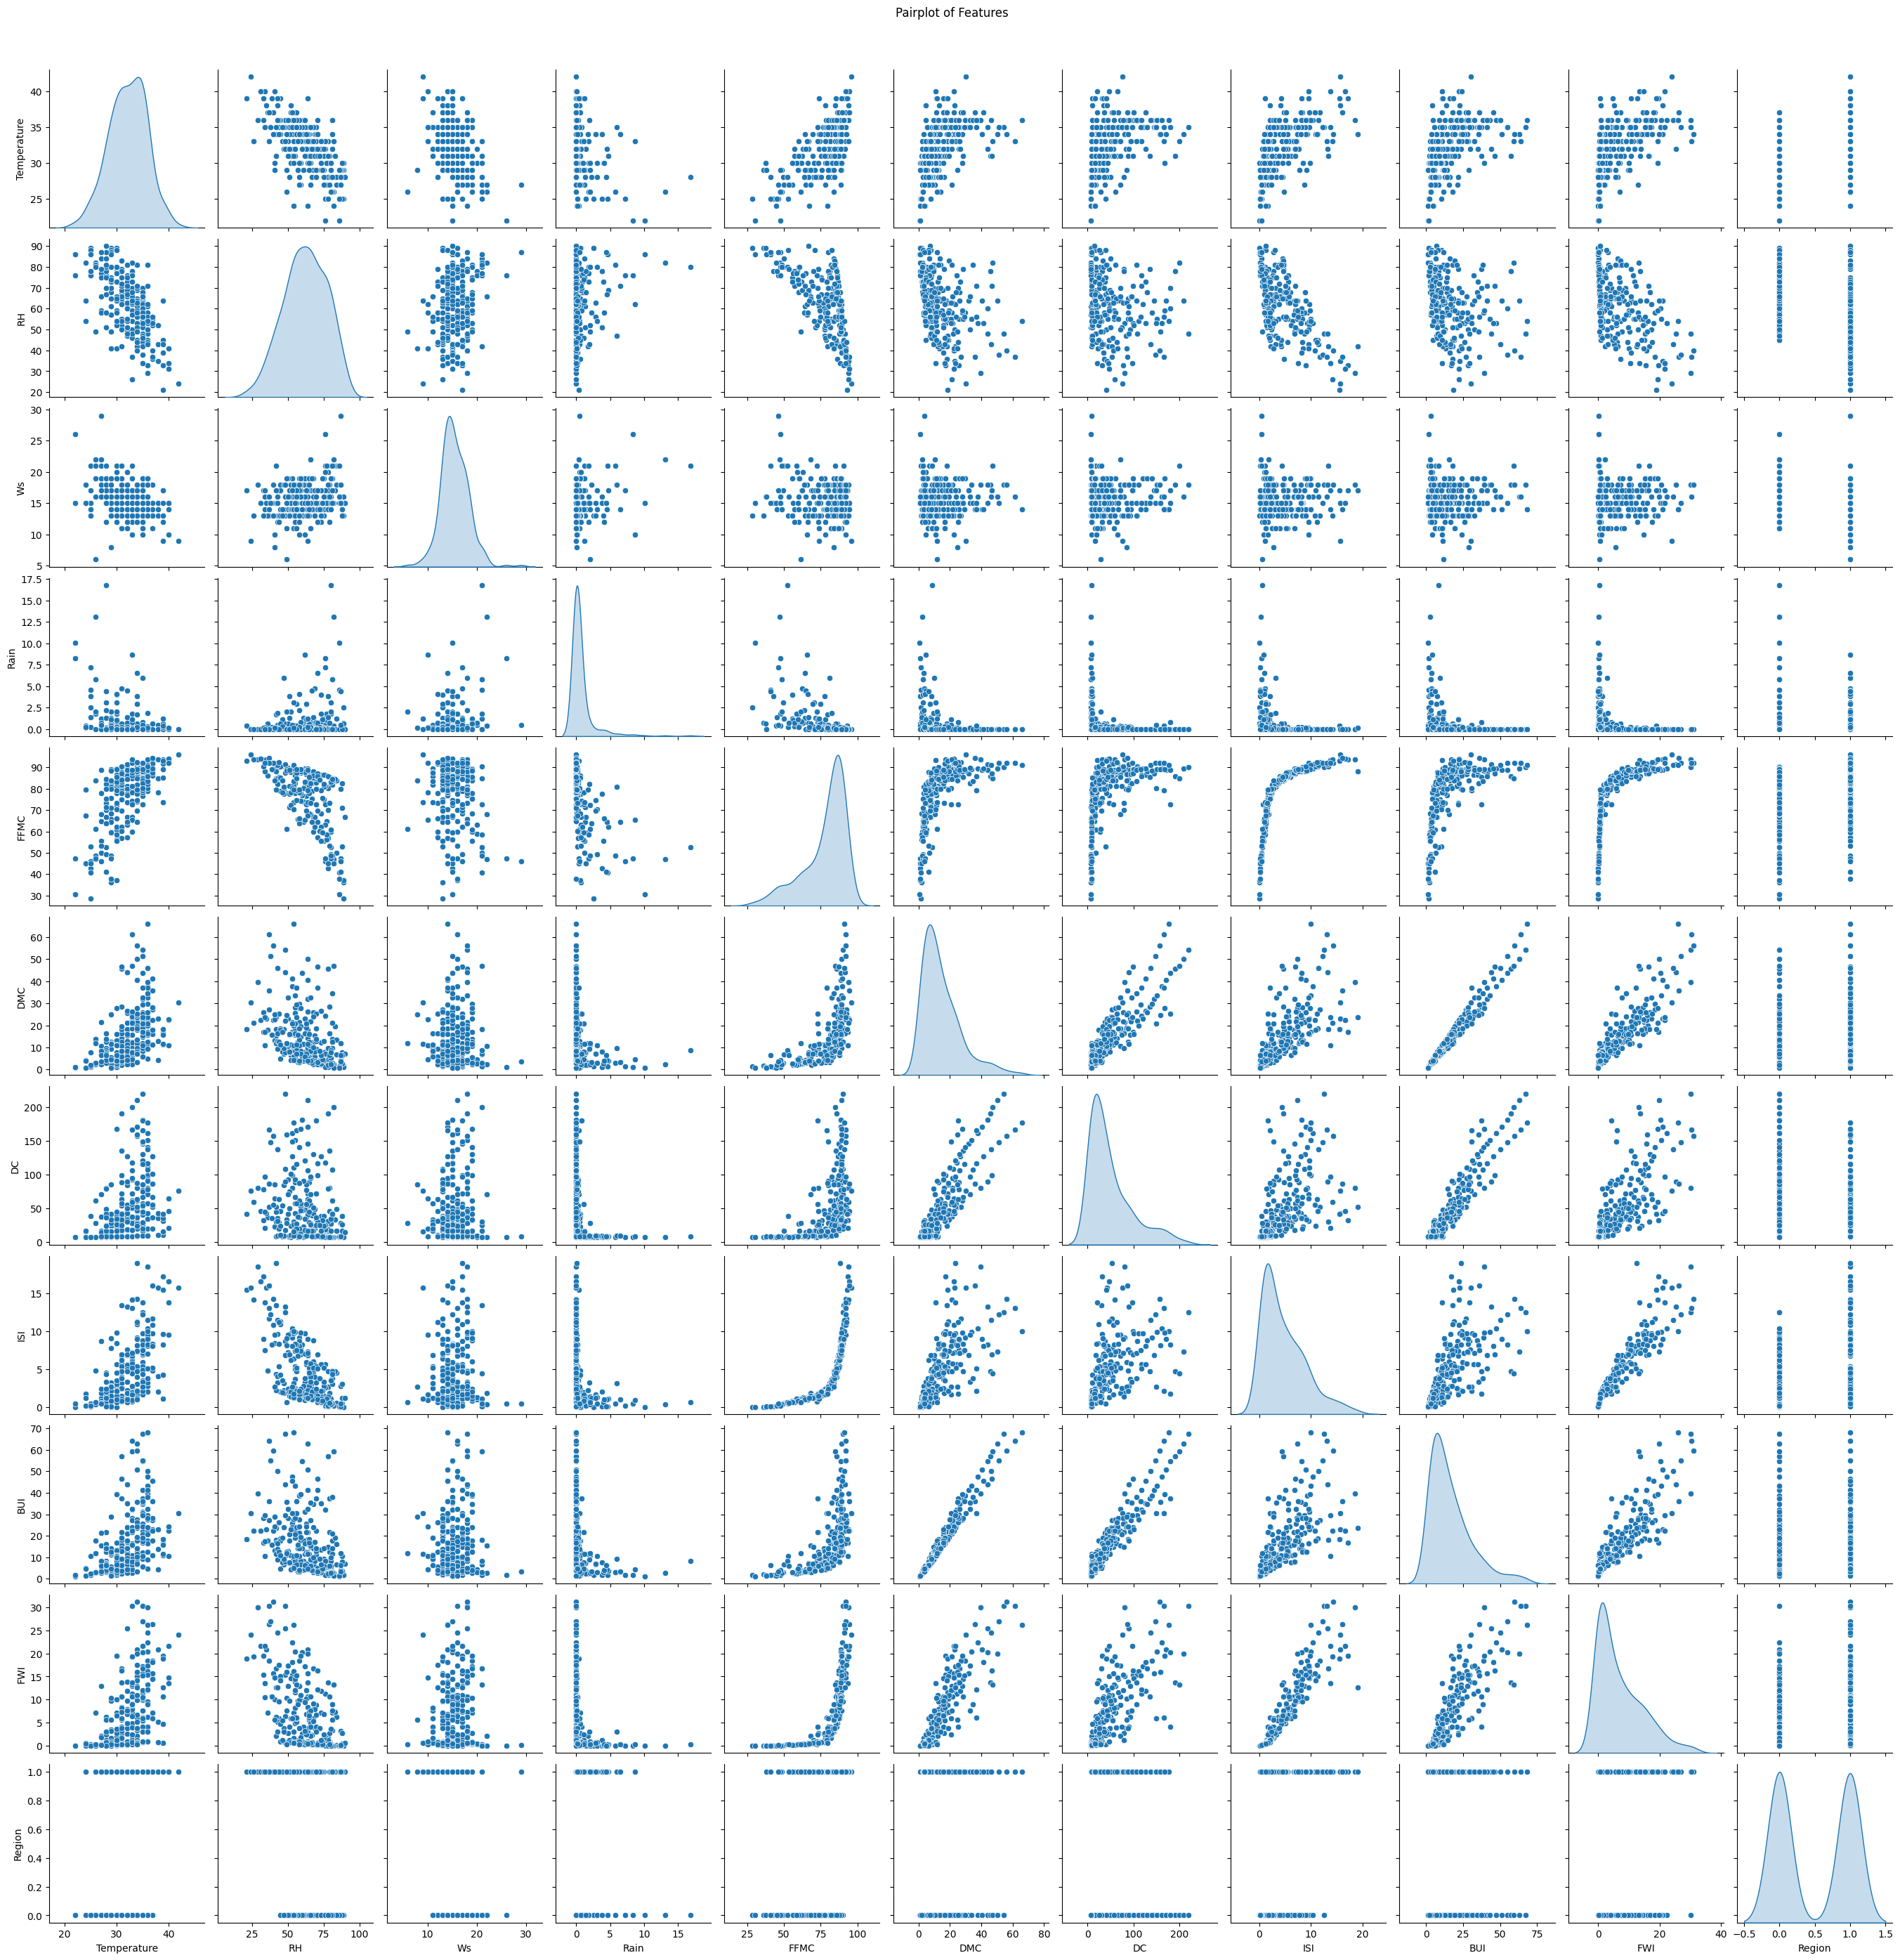


Linear Regression Performance:
R² Score: 0.9878
MAE: 0.4438
RMSE: 0.6089

Ridge Regression Performance:
R² Score: 0.9779
MAE: 0.5721
RMSE: 0.8190

Lasso Regression Performance:
R² Score: 0.9861
MAE: 0.4470
RMSE: 0.6492

Cross-validation (R² mean scores):
Linear: 0.9505514822693882
Ridge: 0.9572607530561512
Lasso: 0.9557903750288377

Loaded Ridge Model Performance:
R² Score: 0.9779
MAE: 0.5721
RMSE: 0.8190


In [2]:
# Algerian Forest Fires - Linear Regression Analysis

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# 2. Load Dataset
df = pd.read_csv("Algerian_forest_fires_cleaned.csv")

# 3. Data Cleaning and Preprocessing
df = df.drop(["day", "month", "year", "Classes"], axis=1)  # Remove unused columns
X = df.drop("FWI", axis=1)
y = df["FWI"]

# 4. Visualizations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# 5. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model Training - Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 7. Ridge Regression with GridSearch
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}
ridge = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# 8. Lasso Regression with GridSearch
lasso_params = {"alpha": [0.01, 0.1, 1, 10, 100]}
lasso = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# 9. Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

# 10. Evaluate All Models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)

# 11. Cross-validation Scores
print("\nCross-validation (R² mean scores):")
print("Linear:", np.mean(cross_val_score(lr, X, y, cv=5)))
print("Ridge:", ridge.best_score_)
print("Lasso:", lasso.best_score_)

# 12. Save the Best Model
best_model = ridge.best_estimator_
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# 13. Load and Test on Unseen Data
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

unseen_pred = loaded_model.predict(X_test)
evaluate_model("Loaded Ridge Model", y_test, unseen_pred)
